In [1]:
import numpy as np
import matplotlib.pyplot as plt
from constants import *
from density_profiles import *
from generate_positions import *
from generate_velocities import *
from velocity_profiles import *

# Density

In [2]:
# Disk
radii = np.linspace(0,200,100)
# profile_disk = rho_exp(radii, 0)  # density values for the disk
# profile_disk = rho_plummer(radii)  # density values for the Plummer sphere profile
# profile_disk = surface_density_gas(radii)  # surface density values for the gas
profile_disk = rho_gas(radii,0)  # surface density values for the gas
counts_disk = num_part(radii, profile_disk, m_particle, is_disk=True)
x_disk, y_disk, z_disk = part_positions(radii, counts_disk, is_disk=True)
densities_disk = compute_dens(radii, x_disk, y_disk, z_disk, is_disk=True)

# Stars
radii = np.linspace(0,200,100)
# profile_stars = surface_density_stars(radii)  # surface density values for the stars
profile_stars = rho_stars(radii,0)  # surface density values for the stars
counts_stars = num_part(radii, profile_stars, m_particle, is_disk=True)
x_stars, y_stars, z_stars = part_positions(radii, counts_stars, is_disk=True)
densities_stars = compute_dens(radii, x_stars, y_stars, z_stars, is_disk=True)

/home/maamari/Documents/Github/profs2particles/generate_positions.py:109: RuntimeWarning: divide by zero encountered in divide
  return masses / areas / h_disk


Plot profiles



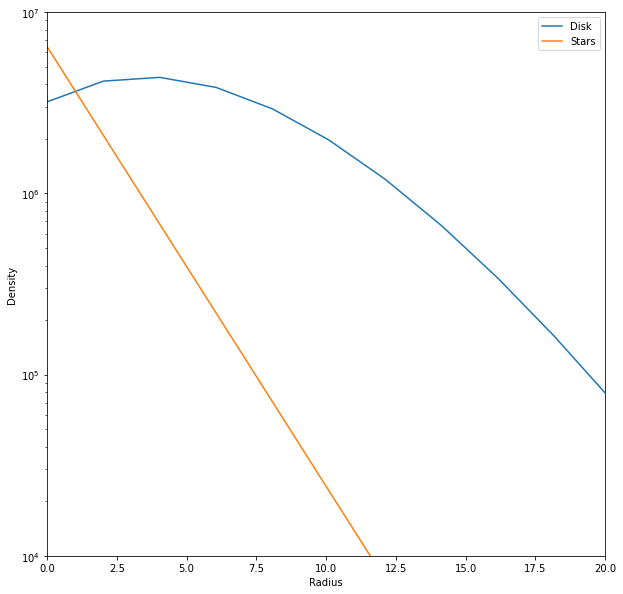

<Figure size 432x288 with 0 Axes>

In [3]:
# Plot the profiles
print("Plot profiles\n")
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(radii, profile_disk, label='Disk')
ax.plot(radii, profile_stars, label='Stars')
ax.set_yscale('log')
ax.set_xlim(0, 20)
ax.set_ylim(1e4, 1e7)
ax.set_xlabel('Radius')
ax.set_ylabel('Density')
ax.legend()
plt.show()
plt.clf()

In [4]:
# Halo
radii = np.logspace(np.log10(0.1), np.log10(200), 100)
rho_0 = m_halo / (4 * np.pi * np.log(1 + c) - c / (1 + c)) 
r_s = (m_halo / (4 * np.pi * rho_0))**(1/3)  
profile_halo = rho_nfw(radii,r_s,rho_0) 
counts_halo = num_part(radii,profile_halo, m_particle)
x_halo, y_halo, z_halo = part_positions(radii, counts_halo)
densities_halo = compute_dens(radii,x_halo, y_halo, z_halo)

Plot profiles



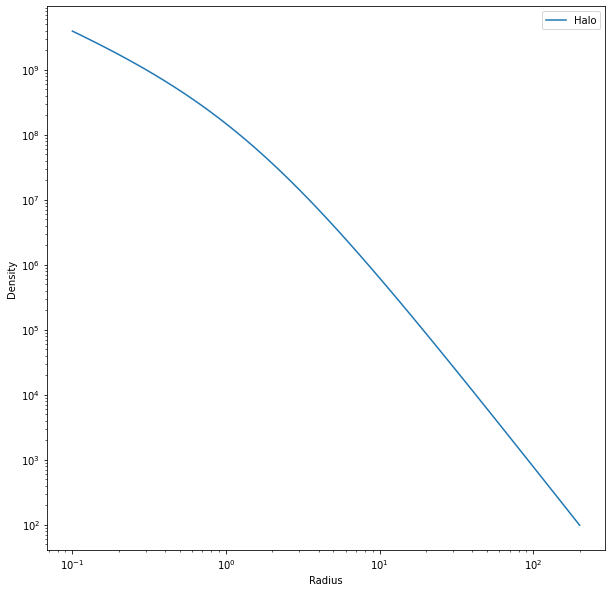

<Figure size 432x288 with 0 Axes>

In [5]:
# Plot the profiles
print("Plot profiles\n")
fig, ax = plt.subplots(figsize=(10, 10))
ax.loglog(radii, profile_halo, label='Halo')
# ax.set_xlim(0, 20)
# ax.set_ylim(1e4, 1e7)
ax.set_xlabel('Radius')
ax.set_ylabel('Density')
ax.legend()
plt.show()
plt.clf()

# Distributions

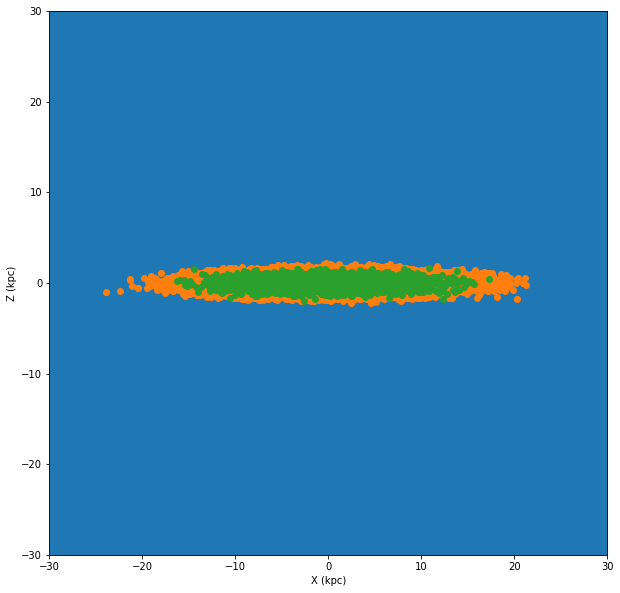

In [6]:
# Plot the distributions
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(x_halo, z_halo)#, z_halo, s=0.1, c='r', label='NFW')
ax.scatter(x_disk, z_disk)#, z_disk, s=0.1, c='b', label='Disk')
ax.scatter(x_stars, z_stars)#, z_disk, s=0.1, c='b', label='Disk')
ax.set_xlabel('X (kpc)')
ax.set_ylabel('Z (kpc)')
# ax.set_zlabel('Z (kpc)')
ax.set_xlim(-30,30)
ax.set_ylim(-30,30)
# ax.legend()
plt.show()

# Dispersion

Using matplotlib backend: <object object at 0x7fadc72d63e0>


inotify_add_watch(/home/maamari/.config/ibus/bus/fe7e3e4654084c768a57251fbfaaa3d5-unix-wayland-0) failed: (No space left on device)


[0.93073593 4.59780039 1.5832652  ... 1.25810492 1.40585444 8.34415584]
[-0.37334296  1.65459411 -0.90674154 ... -2.21406005  1.56941198
  9.73619162]


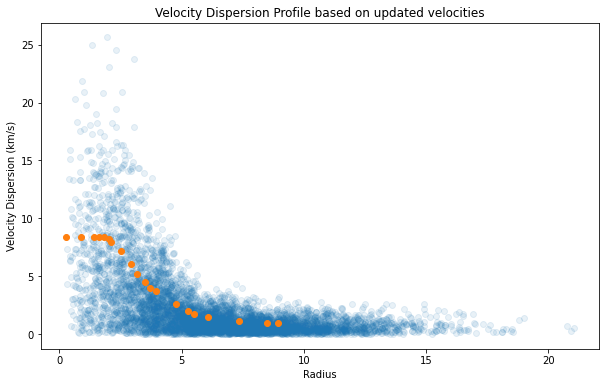

In [7]:
%matplotlib
radii, v_x_disp, v_y_disp, v_z_disp, r, prof = dispersion(x_stars, y_stars, z_stars, 175.0)#, star_disp)
%matplotlib inline

v_mag_updated = np.linalg.norm([v_x_disp,v_y_disp,v_z_disp],axis=0)

# Calculate velocity dispersion based on updated velocity magnitudes
v_disp_updated = np.abs(v_mag_updated) - 175.0
print(v_disp_updated)

# Create figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot velocity dispersion as a function of radius
ax.scatter(radii, np.abs(v_disp_updated),alpha=0.1)#, c=v_disp_updated, cmap="viridis")

# v_disp = np.where(radii < 1, 8.0, np.where(radii > 7, 1.0, 8.0 - (8.0 - 1.0) * ((radii - 1.0) / (7.0 - 1.0))))
ax.scatter(r, prof)#, c=v_disp, cmap="viridis")

# Set labels and title
ax.set_xlabel('Radius')
ax.set_ylabel('Velocity Dispersion (km/s)')

plt.show()